In [209]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [210]:
%matplotlib notebook

In [211]:
D = 1
t0 = .1
t_array = linspace(t0,.8,501)
x_array = linspace(0,2,3000)
x,t = meshgrid(x_array,t_array)
starting_sigma = (2*D*t0)**.5; print(starting_sigma)

0.4472135954999579


<IPython.core.display.Javascript object>


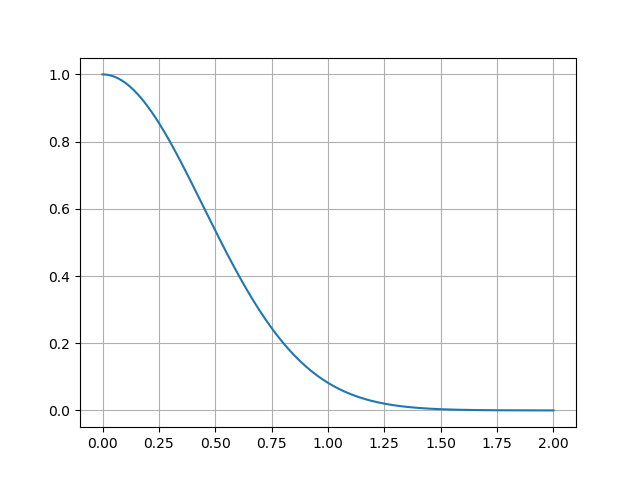

In [212]:
hslice = exp(-x_array**2/(2*starting_sigma**2))
plt.figure()
plt.plot(x_array,hslice)
plt.grid(True)

<IPython.core.display.Javascript object>


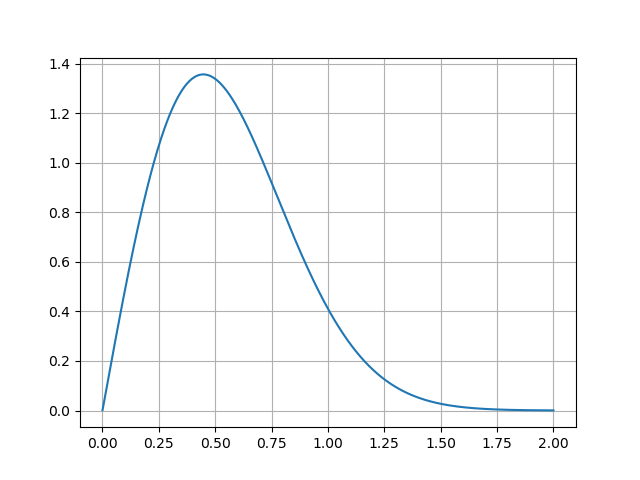

In [213]:
Zslice = -diff(hslice)/diff(x_array)
plt.figure()
plt.plot(x_array[1:],Zslice)
plt.grid(True)

In [214]:
Z2tot = (x**2*(t0/t)**1.0*exp(-x**2/(2*D*t)))/(4*D**2*t**2)
Z2totSize = size(Z2tot)
Z2tot_long = reshape(Z2tot, Z2totSize)
Z2max = max(Z2tot_long); print (Z2max)

1.8393958761205464


<IPython.core.display.Javascript object>


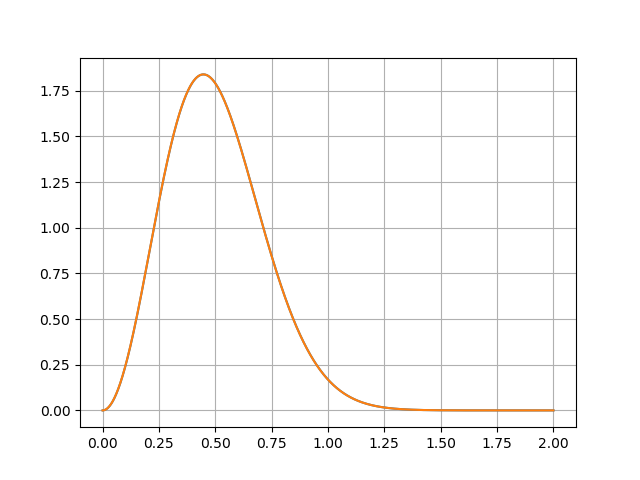

In [215]:
Z2slice = Zslice**2
plt.figure()
plt.plot(x_array[1:],Z2slice)
plt.plot(x_array,Z2tot[0,:])
plt.grid(True)

<IPython.core.display.Javascript object>


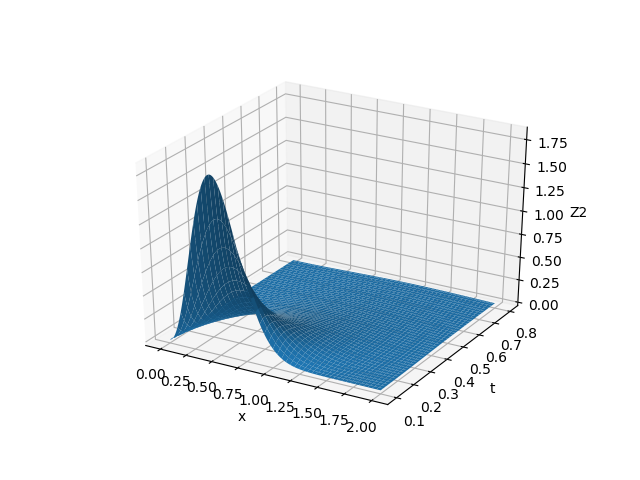

Text(0.5,0,'Z2')

In [216]:
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
ax.plot_surface(x,t, Z2tot) # Make th1 mesh plot
ax.set_xlabel('x') # Label axes
ax.set_ylabel('t')
ax.set_zlabel('Z2')

(501, 2998)
(501,)
(500,)


<IPython.core.display.Javascript object>


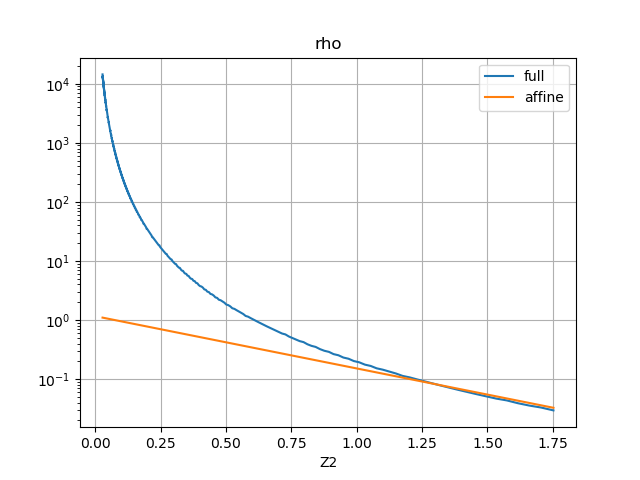

[-2.03839946  0.15087421]


In [248]:
# Getting the approximation based on inflection points
Z2curvature = diff(Z2tot,2,1); print(shape(Z2curvature))
inflection = argmin(Z2curvature,1)
Z2curvature_at_inflection = zeros(len(t_array)); print(shape(Z2curvature_at_inflection))
Z2_at_inflection = zeros(len(t_array))
Z2_weighted = zeros(len(t_array))
for i in range(len(t_array)):
    Z2curvature_at_inflection[i] = -Z2curvature[i,inflection[i]]
    Z2_at_inflection[i] = Z2tot[i,inflection[i]]
Z2curvature_at_inflection_max = max(Z2curvature_at_inflection)
Z2curvature_at_inflection /= Z2curvature_at_inflection_max
Z2curvature_at_inflection_weight = 1/Z2curvature_at_inflection

# plt.figure()
# plt.plot(t_array,Z2curvature_at_inflection)
# plt.xlabel('time')
# plt.title('curvature at inflection, normalized')
# plt.grid(True)

# plt.figure()
# plt.plot(t_array,Z2curvature_at_inflection_weight)
# plt.xlabel('time')
# plt.title('weight due to curvature at inflection')
# plt.grid(True)

dtdZ2 = diff(t_array)/diff(Z2_at_inflection); print(shape(dtdZ2))
rho = -dtdz2*Z2curvature_at_inflection_weight[1:]
plt.figure()
plt.semilogy(Z2_at_inflection[1:],rho,label='full')

# Getting a linear approximation
p = polyfit(Z2_at_inflection[0:5],log(rho[0:5]),1); print(p)
logrho_fit = polyval(p,Z2_at_inflection[1:])
rho_fit = exp(logrho_fit)
plt.semilogy(Z2_at_inflection[1:],rho_fit,label='affine')


plt.xlabel('Z2')
plt.title('rho')
plt.grid(True)
plt.legend()

[1185616  155781   58224   30883   19174   12988    9321    6999    5365
    4237    3333    2698    2221    1747    1435    1077     873     653
     375]
[0.         0.09681031 0.19362062 0.29043093 0.38724124 0.48405155
 0.58086186 0.67767216 0.77448247 0.87129278 0.96810309 1.0649134
 1.16172371 1.25853402 1.35534433 1.45215464 1.54896495 1.64577526
 1.74258557 1.83939588]
ratio =  3161.6426666666666


<IPython.core.display.Javascript object>


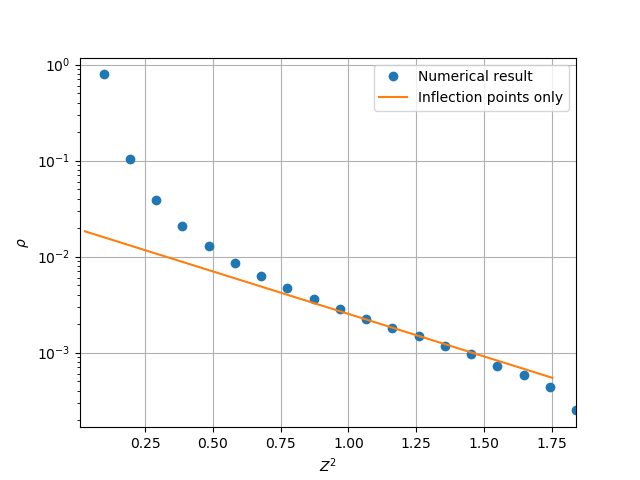

(0.01, 1.8393958761205464)

In [253]:
# Collecting the actual probabilities as a function of Z2
mybins = linspace(0,Z2max,20)
counts, bins = histogram(Z2tot_long,mybins)
print(counts)
print(bins)
print('ratio = ', counts[0]/counts[-1])
counts = counts/sum(counts)
scalefactor = 60

# plt.figure()
# plt.loglog(bins[1:], counts, 'o', label='Numerical result')
# plt.loglog(Z2_at_inflection[1:],rho_fit/scalefactor, label='Inflection points only')
# plt.grid(True)
# plt.xlabel('$Z^2$')
# plt.ylabel(r'$\rho$')
# plt.grid(True)
# plt.legend()
# plt.xlim([.01,Z2max])

plt.figure()
plt.semilogy(bins[1:], counts, 'o', label='Numerical result')
plt.semilogy(Z2_at_inflection[1:],rho_fit/scalefactor, label='Inflection points only')
plt.grid(True)
plt.xlabel('$Z^2$')
plt.ylabel(r'$\rho$')
plt.grid(True)
plt.legend()
plt.xlim([.01,Z2max])

In [219]:
# mybins = linspace(.01,Z2max,20)
# counts, bins = histogram(Z2tot_long,mybins)
# print(counts)
# print(bins)
# print('ratio = ', counts[0]/counts[-1])
# counts = counts/sum(counts)

# plt.figure()
# plt.loglog(bins[1:], counts, 'o', label='Numerical result')
# plt.grid(True)
# plt.xlabel('$Z^2$')
# plt.ylabel(r'$\rho$')
# plt.grid(True)
# plt.title('Probability density averaged over lifetime of the bump')
# plt.xlim([.01,Z2max])

<IPython.core.display.Javascript object>


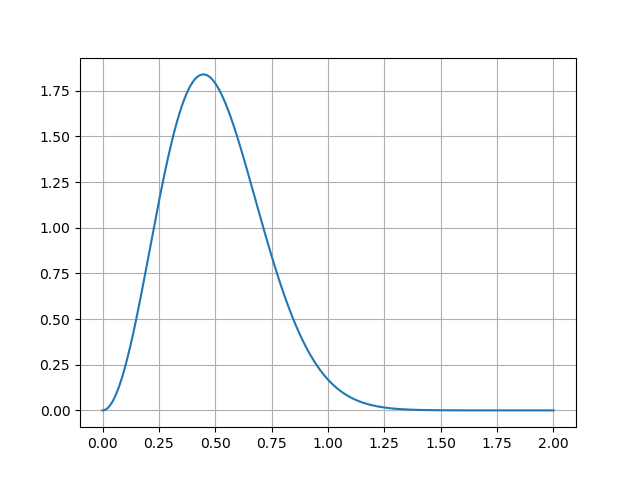

In [220]:
Z2totslice = Z2tot[0,:]
plt.figure()
plt.plot(x_array,Z2totslice)
plt.grid(True)

In [221]:
# plt.figure()
# plt.plot(Z2totslice,x_array)
# plt.xlabel('Z^2')
# plt.ylabel('x')

<IPython.core.display.Javascript object>


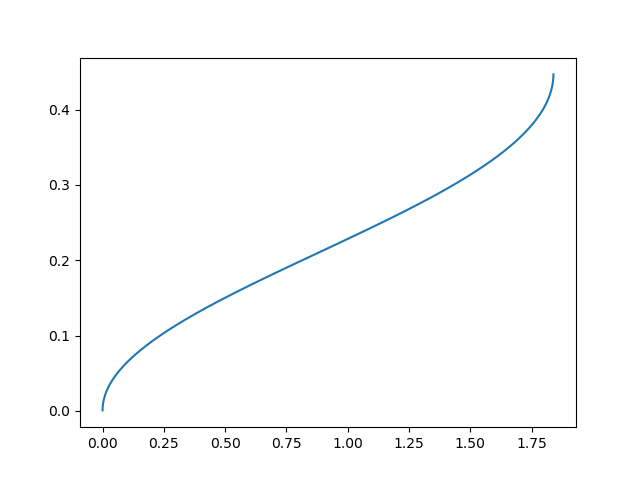

<IPython.core.display.Javascript object>


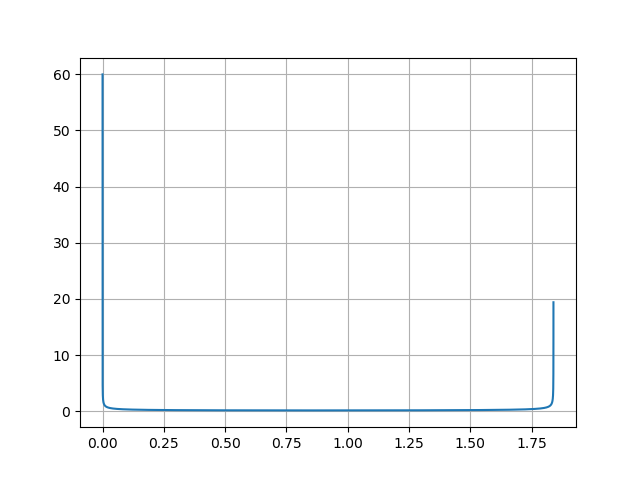

In [222]:
dxdZ2 = diff(x_array)/diff(Z2totslice)
idxdZ2 = squeeze(argwhere(dxdZ2>0))
jdxdZ2 = argwhere(dxdZ2<0)
Z2_branch1 = Z2totslice[idxdZ2]
DeltaZ2_branch1 = diff(Z2_branch1)
x_branch1 = x_array[idxdZ2]
dxdZ2_branch1 = dxdZ2[idxdZ2]
#print(DeltaZ2_branch1)


X_Z2 = x_branch1[0:-1]*DeltaZ2_branch1
x_prime_Z2 = dxdZ2_branch1[0:-1]*DeltaZ2_branch1
#print(X_Z2)
#rhoc_branch1 = cumsum(X_Z2)
rhoc_branch1 = cumsum(x_prime_Z2)

#print(dxdZ2[idxdZ2])
#print(dxdZ2[jdxdZ2])
rho_branch1 = diff(rhoc_branch1)/DeltaZ2_branch1[0:-1]

plt.figure()
plt.plot(Z2_branch1[0:-1], rhoc_branch1)

plt.figure()
plt.plot(Z2_branch1[0:-2], rho_branch1)
plt.grid(True)


#plt.plot(Z2_branch1, x_branch1)
#plt.figure()
# plt.semilogy(Z2totslice[idxdZ2],dxdZ2[idxdZ2],'ko',label='x small leg')
# plt.semilogy(Z2totslice[jdxdZ2],-dxdZ2[jdxdZ2],'ro',label='x big leg')
# plt.grid(True)
# plt.legend()

In [223]:
#func = x_array**2
#print(size(diff))
#df = diff(func)
#print(size(Z2totslice[:99]))
#probfunc = (x_array[:99])*((func[:99]) + df) - (x_array[:99])*(func[:99])
# diff = diff(probfunc)/diff(x_array[:99])
#probfunc = (x_array[((Z2totslice[:-1]) + diff(Z2totslice))] - (x_array[:9-1])*(Z2totslice[:-1])



In [224]:
size(Z2totslice[:-1])

2999

In [225]:
# deriv = diff(probfunc)/diff(Z2totslice[:99])
# plt.figure()
# plt.semilogy(Z2totslice[:98], deriv,'ko')